In [ ]:
import numpy as np
import pandas as pd

In [25]:
df= pd.read_csv('RELIANCE.NS.csv')

In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,418.037415,419.325226,415.610443,416.402924,387.885162,3152667.0
1,2013-01-02,418.037415,423.981079,417.319244,419.993866,391.230164,6203434.0
2,2013-01-03,420.315826,426.952911,418.334595,426.333771,397.135834,7968629.0
3,2013-01-04,426.903381,428.240692,422.767578,426.878632,397.643402,6140890.0
4,2013-01-07,428.785553,431.410645,421.900787,424.278259,395.221069,7064261.0
...,...,...,...,...,...,...,...
2465,2022-12-26,2514.750000,2542.000000,2492.399902,2524.050049,2524.050049,2764496.0
2466,2022-12-27,2530.000000,2548.800049,2515.250000,2544.699951,2544.699951,2659749.0
2467,2022-12-28,2538.000000,2549.800049,2521.500000,2544.449951,2544.449951,3442509.0
2468,2022-12-29,2527.000000,2548.899902,2525.500000,2543.300049,2543.300049,3198493.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2470 non-null   object 
 1   Open       2468 non-null   float64
 2   High       2468 non-null   float64
 3   Low        2468 non-null   float64
 4   Close      2468 non-null   float64
 5   Adj Close  2468 non-null   float64
 6   Volume     2468 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.2+ KB


In [28]:
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [42]:
df_numeric = df.columns.difference(['Date'])
for col in df_numeric:
    if df[col].dtype in['float64']:
        df[col].fillna(df[col].mean(), inplace= True)

C:\Users\PC\AppData\Local\Temp\ipykernel_16584\791045397.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace= True)


In [43]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [44]:
x = df[['Open','High', 'Low', 'Close', 'Volume']].values
y= df['Adj Close'].values

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 0)

In [46]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
lm.score(x_train,y_train)

0.9999758337970556

In [49]:
predicted= lm.predict(x_test)

In [50]:
dframe= pd.DataFrame({'actual': y_test, 'predicted': predicted})
dframe

,actual,predicted
0,2715.873291,2718.842260
1,668.256165,667.754256
2,1213.576660,1208.927834
3,2118.422119,2115.292824
4,1326.719238,1332.122380
...,...,...
489,2047.086792,2043.123683
490,883.566223,884.532136
491,1083.604492,1083.686244
492,509.035278,502.984731


Text(0, 0.5, 'Closing price')

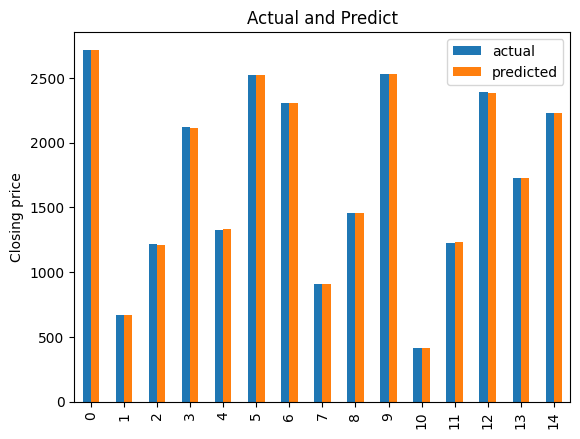

In [53]:
import matplotlib.pyplot as plt
graph= dframe.head(15)
graph.plot(kind = 'bar')
plt.title('Actual and Predict')
plt.ylabel('Closing price')

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, predicted))
mae = mean_absolute_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 3.966186085598966
MAE: 3.247965613952038
R²: 0.9999726646673255
